In [6]:
data_path = '../../files/detect-track-corr.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sorted_correlation_matrix(data_path, sort_by_metric=None, hp_filter=None, experiment_filter=None):
    """
    Generates a visual correlation matrix sorted by the absolute value of the correlation to a given metric.
    If no metric is provided, the correlation matrix is displayed in the order of the data.
    If hp_filter is provided, only examples matching the filter are included, except for the baseline examples.
    If experiment_filter is provided, only examples containing "exp[exp number]" are included.

    Parameters:
    data_path (str): Path to the CSV file containing the data.
    sort_by_metric (str, optional): The metric by which to sort the correlation matrix.
    hp_filter (str, optional): The filter to apply to the examples.
    experiment_filter (str, optional): The experiment filter to apply to the examples.
    """
    # Read the data from the CSV file
    data = pd.read_csv(data_path)

    # Drop the first column as it is treated as a text example name
    example_names = data.iloc[:, 0]
    data = data.drop(data.columns[0], axis=1)

    # Drop columns that do not start with "D-" or "T-"
    columns_to_keep = [col for col in data.columns if col.startswith("D-") or col.startswith("T-")]
    data = data[columns_to_keep]

    # Remove percent signs and convert to float
    data = data.map(lambda x: float(x.strip('%')) if isinstance(x, str) and x.endswith('%') else x)

    if hp_filter:
        # Filter the examples based on the hp_filter
        pattern = re.compile(f'/{hp_filter}[0-9]+$|/baseline')
        mask = example_names.str.contains(pattern)
        data = data[mask]
        example_names = example_names[mask]

    if experiment_filter:
        # Filter the examples based on the experiment_filter
        exp_pattern = re.compile(f'exp{experiment_filter}')
        exp_mask = example_names.str.contains(exp_pattern)
        data = data[exp_mask]
        example_names = example_names[exp_mask]

    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    if sort_by_metric:
        # Sort the correlation matrix by the absolute value of the given metric
        sorted_correlation_matrix = correlation_matrix.reindex(
            correlation_matrix[sort_by_metric].abs().sort_values(ascending=False).index, axis=0)
        sorted_correlation_matrix = sorted_correlation_matrix.reindex(
            sorted_correlation_matrix[sort_by_metric].abs().sort_values(ascending=False).index, axis=1)
    else:
        sorted_correlation_matrix = correlation_matrix

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(sorted_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

    # Show the plot
    plt.show()

In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data_path, x_metric, y_metric, hp_filter=None, experiment_filter=None):
    """
    Generates a scatter plot for the given x and y metrics.
    If hp_filter is provided, only examples matching the filter are included, except for the baseline examples.
    If experiment_filter is provided, only examples containing "exp[exp number]" are included.
    Each point is labeled with the format [hp]=[value].

    Parameters:
    data_path (str): Path to the CSV file containing the data.
    x_metric (str): The metric to be plotted on the x-axis.
    y_metric (str): The metric to be plotted on the y-axis.
    hp_filter (str, optional): The filter to apply to the examples.
    experiment_filter (str, optional): The experiment filter to apply to the examples.
    """
    # Read the data from the CSV file
    data = pd.read_csv(data_path)

    # Drop the first column as it is treated as a text example name
    example_names = data.iloc[:, 0]
    data = data.drop(data.columns[0], axis=1)

    # Remove percent signs and convert to float
    data = data.map(lambda x: float(x.strip('%')) if isinstance(x, str) and x.endswith('%') else x)

    if hp_filter:
        # Filter the examples based on the hp_filter
        pattern = re.compile(f'/{hp_filter}[0-9]+$|/baseline')
        mask = example_names.str.contains(pattern)
        data = data[mask]
        example_names = example_names[mask]

    if experiment_filter:
        # Filter the examples based on the experiment_filter
        exp_pattern = re.compile(f'exp{experiment_filter}')
        exp_mask = example_names.str.contains(exp_pattern)
        data = data[exp_mask]
        example_names = example_names[exp_mask]

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the scatter plot
    scatter_plot = sns.scatterplot(data=data, x=x_metric, y=y_metric)

    # Add labels to each point
    for i, name in enumerate(example_names):
        hp_value = name.split('/')[-1]
        plt.text(data[x_metric].iloc[i], data[y_metric].iloc[i], hp_value, fontsize=8)

    # Show the plot
    plt.show()

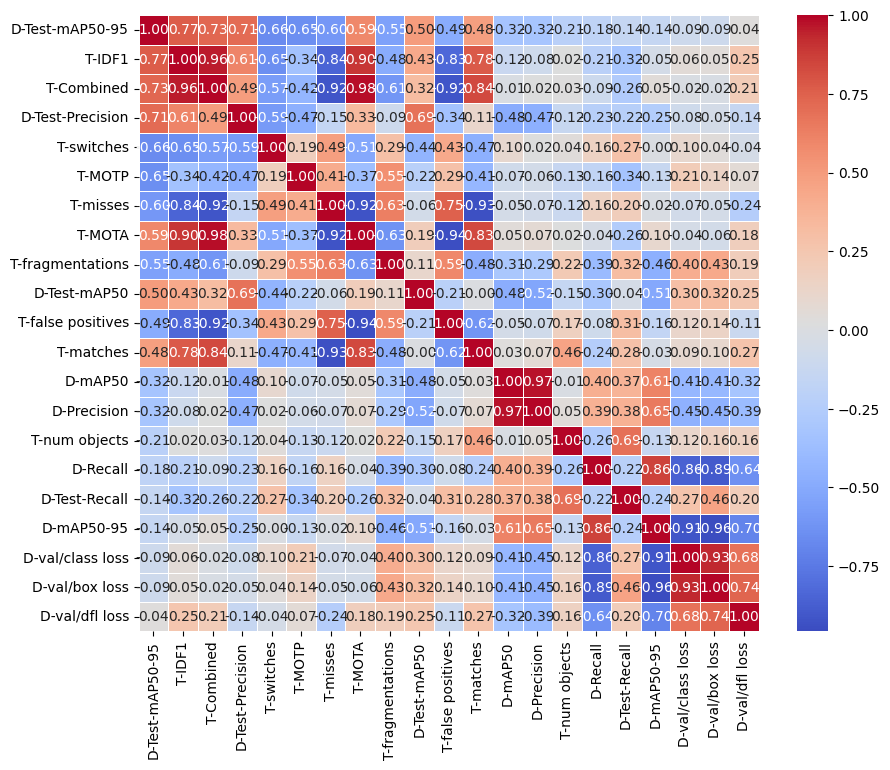

In [27]:
plot_sorted_correlation_matrix(data_path, "D-Test-mAP50-95", experiment_filter=26)

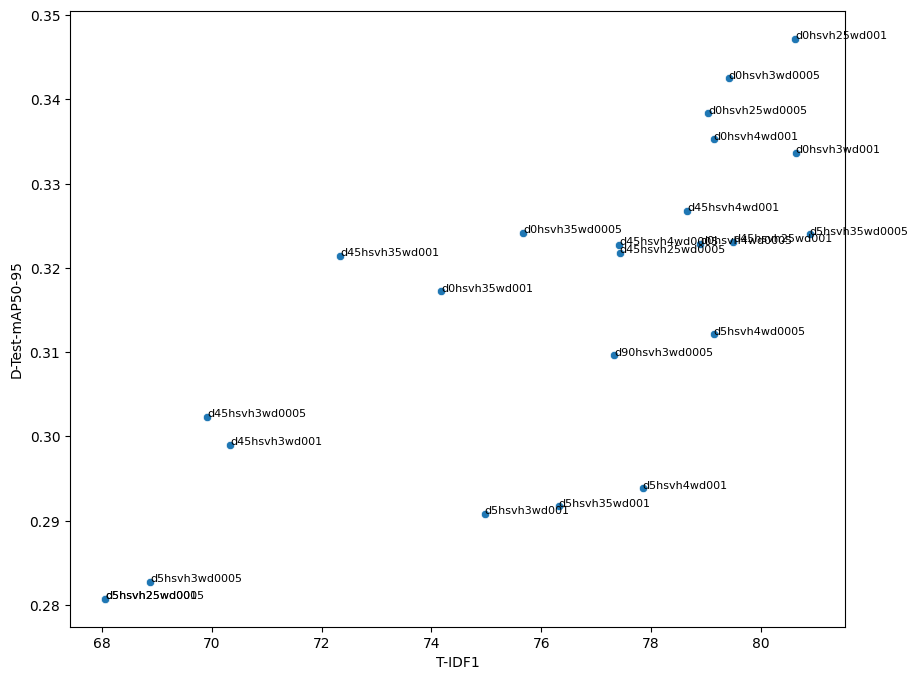

In [28]:
# Example usage
plot_scatter(data_path, 'T-IDF1', 'D-Test-mAP50-95', experiment_filter=26)